# Understanding Convolutional Neural Networks for Image Classification

By Ogunyale Richard Kehinde delivered at PyCon Nigeria Conference

<img src="Convolutional Neural Networks.png">

## Table of Content
- [Introduction](#introduction)
- [How are images represented](#how_are_images_represented)
- [Importing Necessary Libaries](#importing_necessary_libraries)
- [Data Preprocessing](#data_preprocessing)
- [Architecture of Convolutional Neural Network](#architecture_of_convolutional_neural_network)
    - Maxpooling
    - Stride
    - Convolution
    - Filter
    - Flattening
- [Results](#results)

<a id="introduction"> </a>
### Introduction

The first work on modern convolutional neural networks (CNNs) occurred in the 1990s, inspired by the neocognitron. Yann LeCun et al., in their paper [ “Gradient-Based Learning Applied to Document Recognition"](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) demonstrated that a CNN model which aggregates simpler features into progressively more complicated features can be successfully used for handwritten character recognition.

In the course of this tutorial we will be using the following libraries:
- Keras a deep learning framework which is built on tensorflow 
- Numpy a library that is used as an efficient multi-dimensional container of generic data
- tqdm a library that shows the progress of any iterable
- pandas is a high level data manipulation tool
- sci-kit learn is a machine learning tool used for data manipulation and analysis
- Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<a id="how_are_images_represented"> </a>
### How are Images represented

It is important to know that images are represented in pixels. For a black and white image, those pixels are interpreted as a 2D array (for example, 2x2 pixels). Every pixel has a value between 0 and 255. (Zero is completely black and 255 is completely white. The greyscale exists between those numbers.) Based on that information, the computer can begin to work on the data.
For a color image, this is a 3D array with a blue layer, a green layer, and a red layer. Each one of those colors has its own value between 0 and 255. The color can be found by combining the values in each of the three layers.

<img src="pixel.gif" />

<a id="importing_necessary_libraries"> </a>
### Importing Necessary Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import Model
from keras.layers.merge import concatenate
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


We imported some modules from the Keras library and we shall be explaining them as we use them in the course of this notebook.

<a id="data_preprocessing"> </a>
### Data Preprocessing

In [2]:
train = pd.read_csv('train.csv')
train.head(5)

,dishes_zones,name_of_dish,file
0,Yoruba,amala,0_0_0001.jpeg
1,Yoruba,amala,0_0_0002.jpeg
2,Yoruba,amala,0_0_0003.jpeg
3,Yoruba,amala,0_0_0004.jpeg
4,Yoruba,amala,0_0_0005.jpeg


The code above reads the csv file where name of dish and the files resides. And the code below loops through the folder where the images resides and gets the images with the name of the files.

In [3]:
train_image=[]
for i in tqdm (range(train.shape[0])):
    
    img= image.load_img('Yoruba/'+train['file'][i], target_size=(170,140), grayscale=False)
    img=image.img_to_array(img)
    img=img/255
    train_image.append(img)
X=np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:18<00:00, 17.87it/s]


In [5]:
dataset=[train]
dish={'iyan':0, 'efo':1, 'amala':2, 'eba':3, 'ewedu':4, 'fufu':5}
for data in dataset:
    train['dish']=train['name_of_dish'].replace(dish)

The above code maps the string of dishes to a unique integer, this is done so that it can ba passed into the `to_categorical` module in keras to change it to a categorical feature. 

In [6]:
labelNames=['iyan', 'efo', 'amala', 'eba', 'ewedu', 'fufu']
y=to_categorical(train['dish'])
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, test_size=0.2)

In the above code, we use the `to_categorical` module in keras to convert each of the strings to categorical features. 

Also, the data was split into 80% train set and 20% test set. 

In [7]:
X_train.shape

(270, 170, 140, 3)

<a id="architecture_of_convolutional_neural_network"> </a>
## Building the Neural Network Architecture 

### Max Pooling

Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map.

Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned. 

Pooling layer is needed in the CNN architecture so as to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation network 

<img src='max-pooling.png'>

<img src='keras_conv2d_padding.gif'>

`NOTE:` The image above is not performing a max-pooling operation but just shows how pooling layer operates

### Stride

Stride is the number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time and so on. The below figure shows convolution would work with a stride of 2.
<img src="Strides.png" />

### Convolution

The primary purpose of Convolution in case of a ConvNet is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

<img src="convolution.gif" />

Take a moment to understand how the computation above is being done. We slide the orange matrix over our original image (green) by 1 pixel (also called ‘stride’) and for every position, we compute element wise multiplication (between the two matrices) and add the multiplication outputs to get the final integer which forms a single element of the output matrix (pink). Note that the 3×3 matrix “sees” only a part of the input image in each stride.

To calculate the convolution layer output size we have:
\begin{equation*}
size_{output} = size_{input} - (size_{filter} - 1)
\end{equation*}

To read more about the convolutional layer check out this [link](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

### Filter

Filter in the convolution layer is often also called kernel or feature detector. The size of the kernel is a very important factor determining the convolution layer output.  Filters act as feature detectors from the original image input. 

From the example in the convolutional layer, the 3 x 3 matrix is the filter. The final matrix formed by sliding the filter and computing the dot product is called feature map or convolved feature

It is worthy to note that different filter will produce different feature map for the same input image. 

### Flattening

The flattening layer is the layer found in-between the convolutional layer and the fully connected layer i.e the dense layer. The flattening layer transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

<img src="flattening.png"/>

### Activation Function

There are three classes of Activation function and they are: binary step, linear and non-linear activation functions. 
* Binary Step: A binary step function is a threshold-based activation function. If the input value is above or below a certain threshold, the neuron is activated and sends exactly the same signal to the next layer.
* Sigmoid: This is a type of non- linear activation function and it is represented with the equation below:

\begin{equation*}
f(x)   = \frac{1}{1+e^{x}}
\end{equation*}

The sigmoid activation function output values bound between 0 and 1, normalizing the output of each neuron.

* Tanh or Hyperbolic tangent function: This is also a type of non-linear activation function, it can be represented with thw equation below:

\begin{equation*}
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{equation*}

Tanh is zero- centered making it easier to model inputs that have strongly negative, neutral, and strongly positive values

* Rectified Linear Unit (ReLU): This is a type of non-linear activation function, it is represented with the mathematical equation below:

\begin{equation*}
f(x) = max(0, z)
\end{equation*}
One of the interesting things about ReLU is that it is computationally efficient and it converges faster.

To understand further on Activation Functions you can check out this [link](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

<img src='activation_functions.png'>

In the figure below we can see the Rectified Linear Unit Acctivation function in action:
<img src="Relu.png" />

### Structure of the Model

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(170,140,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

To understand how to implement these layers in Keras, you can checkout Keras documentation [here](https://keras.io/layers)

In [21]:
from keras.utils import plot_model
import pydot
# build the model in functional API
model = model
# verify the model using graph
plot_model(model, to_file='cnn-network-architecture.png', show_shapes=True)
# verify the model using layer text description
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 168, 138, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 69, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 82, 67, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 33, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 41, 33, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 86592)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               11083904  
__________

<img src='cnn-network-architecture.png'>

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 270 samples, validate on 68 samples
Epoch 1/10
270/270 [==============================] - 45s 166ms/step - loss: 4.4492 - acc: 0.2963 - val_loss: 1.4533 - val_acc: 0.4706
Epoch 2/10
270/270 [==============================] - 37s 138ms/step - loss: 1.2842 - acc: 0.5815 - val_loss: 1.0643 - val_acc: 0.6176
Epoch 3/10
270/270 [==============================] - 36s 134ms/step - loss: 0.7907 - acc: 0.7556 - val_loss: 0.5790 - val_acc: 0.8235
Epoch 4/10
270/270 [==============================] - 38s 139ms/step - loss: 0.5999 - acc: 0.7963 - val_loss: 0.5971 - val_acc: 0.8529
Epoch 5/10
270/270 [==============================] - 39s 145ms/step - loss: 0.4148 - acc: 0.8630 - val_loss: 0.7341 - val_acc: 0.8235
Epoch 6/10
270/270 [==============================] - 37s 137ms/step - loss: 0.3941 - acc: 0.8704 - val_loss: 0.7055 - val_acc: 0.8529
Epoch 7/10
270/270 [==============================] - 37s 138ms/step - loss: 0.3419 - acc: 0.8926 - val_loss: 0.5605 - val_acc: 0.8382
Epoch 8/10

In [24]:
print(H.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<a id=results ></a>
## Results

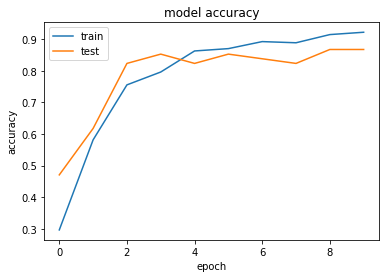

In [25]:
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

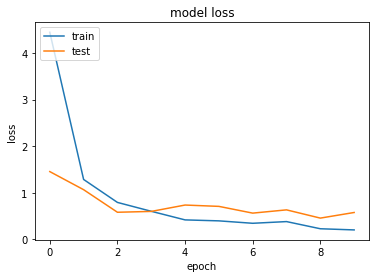

In [26]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [27]:
# make predictions on the test set
preds = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

0.8676470588235294


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

        iyan       0.83      1.00      0.91        15
         efo       0.85      1.00      0.92        17
       amala       0.91      0.77      0.83        13
         eba       0.80      0.80      0.80        10
       ewedu       1.00      0.80      0.89        10
        fufu       1.00      0.33      0.50         3

   micro avg       0.87      0.87      0.87        68
   macro avg       0.90      0.78      0.81        68
weighted avg       0.88      0.87      0.86        68



In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[15  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 1  2 10  0  0  0]
 [ 2  0  0  8  0  0]
 [ 0  1  1  0  8  0]
 [ 0  0  0  2  0  1]]


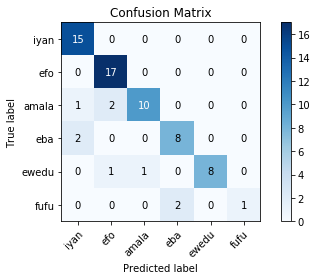

In [31]:
class_names=np.array(('iyan', 'efo', 'amala', 'eba', 'ewedu', 'fufu'))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')